In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
gap_score = -1
match_score = +1
mismatch_score = -1
call_counter = 0

In [3]:
def align(seq1, seq2):
    global call_counter
    call_counter += 1
    if not seq1:
        return "-" * len(seq2), seq2, len(seq2) * gap_score
    
    if not seq2:
        return seq1, "-" * len(seq1), len(seq1) * gap_score
    
    aligned1_left, aligned2_left, score_left = align(seq1, seq2[:-1])
    aligned1_left_result = aligned1_left + "-"
    aligned2_left_result = aligned2_left + seq2[-1]
    score_left = score_left + gap_score
    
    result_left = [score_left, aligned1_left_result, aligned2_left_result]
    
    aligned1_right, aligned2_right, score_right = align(seq1[:-1], seq2)
    aligned1_right_result = aligned1_right + seq1[-1]
    aligned2_right_result = aligned2_right + "-"
    score_right = gap_score + score_right
    
    result_right = [score_right, aligned1_right_result, aligned2_right_result]
    
    aligned1_middle, aligned2_middle, score_middle = align(seq1[:-1], seq2[:-1])
    
    aligned1_middle_result = aligned1_middle + seq1[-1]
    aligned2_middle_result = aligned2_middle + seq2[-1]
    
    if seq1[-1] == seq2[-1]:
        score_adjustment = match_score
    else:
        score_adjustment = mismatch_score
        
    score_middle = score_middle + score_adjustment
    result_middle = [score_middle, aligned1_middle_result, aligned2_middle_result]
    results = [result_left, result_right, result_middle]
    results.sort()
    result = results[-1]
    
    return result[1], result[2], result[0]

In [4]:
def align_fast(seq1, seq2, cache = None):
    global call_counter
    call_counter += 1
    if cache == None:
        cache = {}
        
    if not seq1:
        return "-" * len(seq2), seq2, len(seq2) * gap_score
    
    if not seq2:
        return seq1, "-" * len(seq1), len(seq1) * gap_score

    left_seqs = seq1, seq2[:-1]
    
    if left_seqs in cache:
        aligned1_left, aligned2_left, score_left = cache[left_seqs]
    else:
        aligned1_left, aligned2_left, score_left = align_fast(*left_seqs, cache)
        cache[left_seqs] = aligned1_left, aligned2_left, score_left
    
    aligned1_left_result = aligned1_left + "-"
    aligned2_left_result = aligned2_left + seq2[-1]
    score_left = score_left + gap_score
    result_left = (score_left, aligned1_left_result, aligned2_left_result)
    
    right_seqs = seq1[:-1], seq2
    
    if right_seqs in cache:
        aligned1_right, aligned2_right, score_right = cache[right_seqs]
    else:
        aligned1_right, aligned2_right, score_right = align_fast(*right_seqs, cache)
        cache[right_seqs] = aligned1_right, aligned2_right, score_right

    aligned1_right_result = aligned1_right + seq1[-1]
    aligned2_right_result = aligned2_right + "-"
    score_right = gap_score + score_right
    result_right = (score_right, aligned1_right_result, aligned2_right_result)
    
    mid_seqs = seq1[:-1], seq2[:-1]
    
    if mid_seqs in cache:
         aligned1_middle, aligned2_middle, score_middle = cache[mid_seqs]
    else:
        aligned1_middle, aligned2_middle, score_middle = align_fast(*mid_seqs, cache)
        cache[mid_seqs] = aligned1_middle, aligned2_middle, score_middle
    
    aligned1_middle_result = aligned1_middle + seq1[-1]
    aligned2_middle_result = aligned2_middle + seq2[-1]
    
    if seq1[-1] == seq2[-1]:
        score_adjustment = match_score
    else:
        score_adjustment = mismatch_score

    score_middle = score_middle + score_adjustment
    result_middle = (score_middle, aligned1_middle_result, aligned2_middle_result)
        
    cache[mid_seqs] = result_middle
        
    results = [result_left, result_right, result_middle]
    results.sort()
    result = results[-1]
    
    return result[1], result[2], result[0]

In [54]:
call_counter = 0
align("GCATGCTAA", "GATTACAAA")

('GCATG-CTAA', 'G-ATTACAAA', 2)

In [55]:
call_counter

2193844

In [7]:
gap_score = -1
match_score = +1
mismatch_score = -1

In [8]:
call_counter = 0
align_fast("GCATGCTGCATGCT", "GATTACAGATTACA")

('GCATG-CTGCATG-CT', 'G-ATTACAG-ATTACA', 0)

In [9]:
call_counter

225

In [10]:
def prepare_plot(p):
    result1 = []
    result2 = []
    a = "GCATGCT"
    b = "GATTACA"
    for i in range(p):
        result1.append(a[i%len(a)])
        result2.append(b[i%len(b)])
    return "".join(result1), "".join(result2)

In [12]:
import time

In [56]:
time1 = []
call_count1 = []
import gc
for seq1, seq2 in [prepare_plot(i) for i in range(12)]:
    print(seq1, seq2)
    gc.collect()
    start = time.time()
    call_counter = 0
    align(seq1, seq2)
    stop = time.time()
    time1.append(stop - start)
    call_count1.append(call_counter)

 
G G
GC GA
GCA GAT
GCAT GATT
GCATG GATTA
GCATGC GATTAC
GCATGCT GATTACA
GCATGCTG GATTACAG
GCATGCTGC GATTACAGA
GCATGCTGCA GATTACAGAT
GCATGCTGCAT GATTACAGATT


KeyboardInterrupt: 

Text(0,0.5,'seconds')

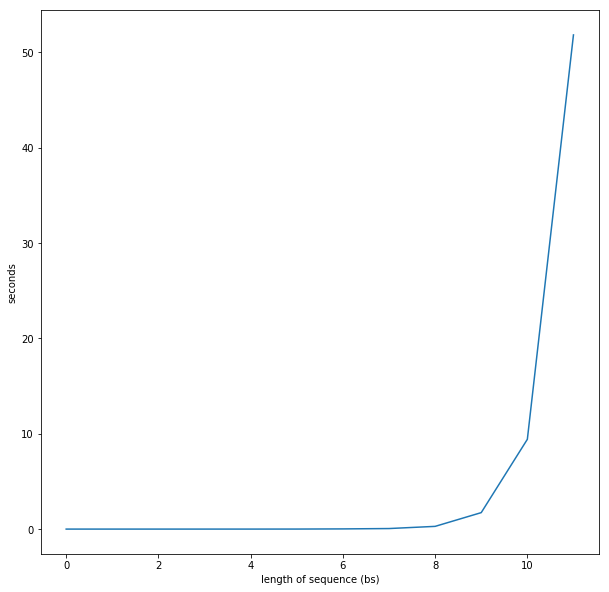

In [39]:
plt.plot(time1)
plt.xlabel("length of sequence (bs)")
plt.ylabel("seconds")

In [43]:
call_count1

[1, 4, 19, 94, 481, 2524, 13483, 72958, 398593, 2193844, 12146179, 67570078]

In [74]:
time2 = []
call_count2 = []
import gc
for seq1, seq2 in [prepare_plot(i) for i in range(100)]:
    print(seq1, seq2)
    gc.collect()
    start = time.time()
    call_counter = 0
    align_fast(seq1, seq2)
    stop = time.time()
    time2.append(stop - start)
    call_count2.append(call_counter)

 
G G
GC GA
GCA GAT
GCAT GATT
GCATG GATTA
GCATGC GATTAC
GCATGCT GATTACA
GCATGCTG GATTACAG
GCATGCTGC GATTACAGA
GCATGCTGCA GATTACAGAT
GCATGCTGCAT GATTACAGATT
GCATGCTGCATG GATTACAGATTA
GCATGCTGCATGC GATTACAGATTAC
GCATGCTGCATGCT GATTACAGATTACA
GCATGCTGCATGCTG GATTACAGATTACAG
GCATGCTGCATGCTGC GATTACAGATTACAGA
GCATGCTGCATGCTGCA GATTACAGATTACAGAT
GCATGCTGCATGCTGCAT GATTACAGATTACAGATT
GCATGCTGCATGCTGCATG GATTACAGATTACAGATTA
GCATGCTGCATGCTGCATGC GATTACAGATTACAGATTAC
GCATGCTGCATGCTGCATGCT GATTACAGATTACAGATTACA
GCATGCTGCATGCTGCATGCTG GATTACAGATTACAGATTACAG
GCATGCTGCATGCTGCATGCTGC GATTACAGATTACAGATTACAGA
GCATGCTGCATGCTGCATGCTGCA GATTACAGATTACAGATTACAGAT
GCATGCTGCATGCTGCATGCTGCAT GATTACAGATTACAGATTACAGATT
GCATGCTGCATGCTGCATGCTGCATG GATTACAGATTACAGATTACAGATTA
GCATGCTGCATGCTGCATGCTGCATGC GATTACAGATTACAGATTACAGATTAC
GCATGCTGCATGCTGCATGCTGCATGCT GATTACAGATTACAGATTACAGATTACA
GCATGCTGCATGCTGCATGCTGCATGCTG GATTACAGATTACAGATTACAGATTACAG
GCATGCTGCATGCTGCATGCTGCATGCTGC GATTACAGATTACAGATTACAGATTACAGA
GCATGCTG

GCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCT GATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACA
GCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTGCATGCTG GATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAGATTACAG


Text(0,0.5,'seconds')

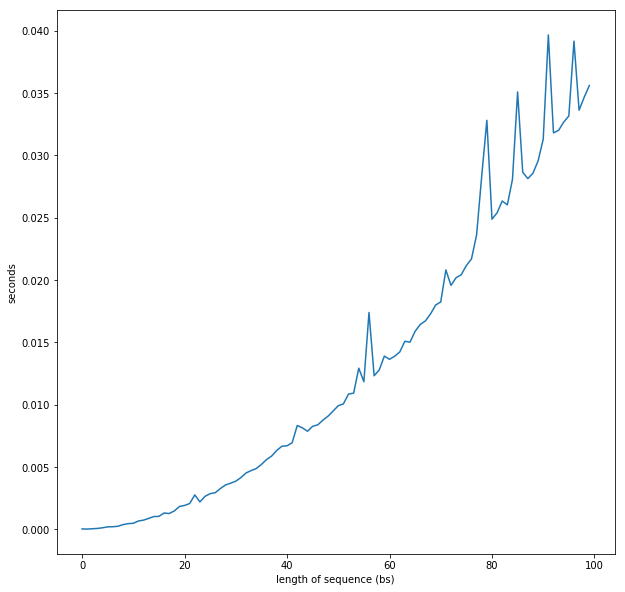

In [73]:
plt.plot(time2)
plt.xlabel("length of sequence (bs)")
plt.ylabel("seconds")

In [59]:
print(call_count2)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801, 10000]


In [60]:
import math
math.sqrt(10**6)

1000.0